In [14]:
import numpy as np
import timecorr as tc
import seaborn as sns
import os
from matplotlib import pyplot as plt
from scipy.stats import wishart
import hypertools as hyp
from scipy.spatial.distance import cdist

%matplotlib inline

SMALL_SIZE = 18
MEDIUM_SIZE = 21
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
if not os.path.isdir('figs'):
    os.mkdir('figs')
figdir = 'figs'

In [3]:
def random_corrmat(K):
    x = np.random.randn(K, K)
    x /= np.max(np.abs(x))
    np.fill_diagonal(x, 1.)
    return x

In [4]:
def ramping_dataset(K, T):
    a = tc.mat2vec(random_corrmat(K))
    b = tc.mat2vec(random_corrmat(K))
    
    mu = np.linspace(0, 1, T)
    
    corrs = np.zeros([T, int((K**2 - K)/2 + K)])
    Y = np.zeros([T, K])
    
    for t in np.arange(T):
        corrs[t, :] = mu[t]*a + (1 - mu[t])*b
        Y[t, :] = np.random.multivariate_normal(mean=np.zeros([K]), cov=tc.vec2mat(corrs[t, :]))
    
    return Y, corrs

In [26]:
def recovery_test(data, true_corrs, **kwargs):
    recovered_corrs = tc.timecorr(Y, **kwargs)
    return np.diag(1 - cdist(true_corrs, recovered_corrs, 'correlation'))

In [ ]:
tc.timecorr(weights_function=)

In [34]:
K = 10
T = 1000
Y, corrs = ramping_dataset(10, T)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  if sys.path[0] == '':


Text(0,0.5,'Correlation\n(recovered vs. ground truth)')

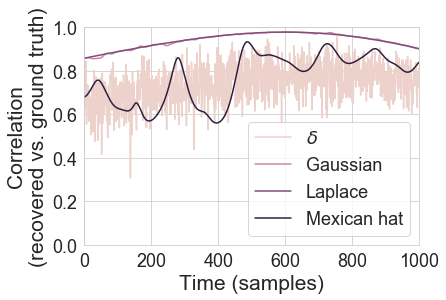

In [35]:
colors = sns.cubehelix_palette(n_colors=4)
plt.plot(np.arange(T), recovery_test(Y, corrs, weights_function=tc.eye_weights, weights_params=tc.eye_params), color=colors[0])
plt.plot(np.arange(T), recovery_test(Y, corrs, weights_function=tc.gaussian_weights, weights_params=tc.gaussian_params), color=colors[1])
plt.plot(np.arange(T), recovery_test(Y, corrs, weights_function=tc.laplace_weights, weights_params=tc.laplace_params), color=colors[2])
plt.plot(np.arange(T), recovery_test(Y, corrs, weights_function=tc.mexican_hat_weights, weights_params=tc.mexican_hat_params), color=colors[3])
plt.legend(['$\delta$', 'Gaussian', 'Laplace', 'Mexican hat'])
plt.ylim([0, 1])
plt.xlim([0, T-1])
plt.xlabel('Time (samples)')
plt.ylabel('Correlation\n(recovered vs. ground truth)')